In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import boxcox, shapiro
from sklearn.preprocessing import PowerTransformer

In [2]:
portafolio = pd.read_excel("ipc_componentes.xlsx")
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [3]:
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [4]:
ticker = yf.Tickers(portafolio['ticker yahoo'].tolist())
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  35 of 35 completed


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702614,24.689169,37.795326,11.671397,152.225342,NaN,34.200203,15.430020,11.531770,37.507210,...,38.958519,38.346149,33.284706,262.346069,130.751785,NaN,54.440792,88.730598,23.547867,22.750074
2015-02-01 00:00:00+00:00,70.285492,29.111103,43.193314,11.671397,159.254822,NaN,37.858753,16.780148,13.125945,44.206852,...,39.022579,39.573223,34.902481,281.710815,138.726196,NaN,55.739502,92.414062,23.328474,28.753899
2015-03-01 00:00:00+00:00,69.477196,27.682066,42.006329,11.124301,159.635437,NaN,38.791325,16.133081,12.536794,41.669655,...,42.517673,41.436150,32.001614,235.338333,126.094254,NaN,54.553104,91.677383,23.035957,30.059095
2015-04-01 00:00:00+00:00,69.892464,27.996630,43.400566,11.737050,168.668915,NaN,36.944115,18.360479,13.335611,41.570332,...,45.450417,42.735737,35.294956,230.718781,136.695740,NaN,61.762737,101.554535,23.328474,28.584150
2015-05-01 00:00:00+00:00,70.519691,27.223787,43.626667,11.744344,176.417725,NaN,37.374542,16.991690,12.993213,42.587982,...,46.048355,40.197926,37.479816,242.054337,130.000092,NaN,59.649693,105.901924,22.910898,30.507950


In [5]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [6]:
data.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,65.702614,24.689169,37.795326,11.671397,152.225342,NaN,34.200203,15.430020,11.531770,37.507210,...,38.958519,38.346149,33.284706,262.346069,130.751785,NaN,54.440792,88.730598,23.547867,22.750074
2015-02-01,70.285492,29.111103,43.193314,11.671397,159.254822,NaN,37.858753,16.780148,13.125945,44.206852,...,39.022579,39.573223,34.902481,281.710815,138.726196,NaN,55.739502,92.414062,23.328474,28.753899
2015-03-01,69.477196,27.682066,42.006329,11.124301,159.635437,NaN,38.791325,16.133081,12.536794,41.669655,...,42.517673,41.436150,32.001614,235.338333,126.094254,NaN,54.553104,91.677383,23.035957,30.059095
2015-04-01,69.892464,27.996630,43.400566,11.737050,168.668915,NaN,36.944115,18.360479,13.335611,41.570332,...,45.450417,42.735737,35.294956,230.718781,136.695740,NaN,61.762737,101.554535,23.328474,28.584150
2015-05-01,70.519691,27.223787,43.626667,11.744344,176.417725,NaN,37.374542,16.991690,12.993213,42.587982,...,46.048355,40.197926,37.479816,242.054337,130.000092,NaN,59.649693,105.901924,22.910898,30.507950


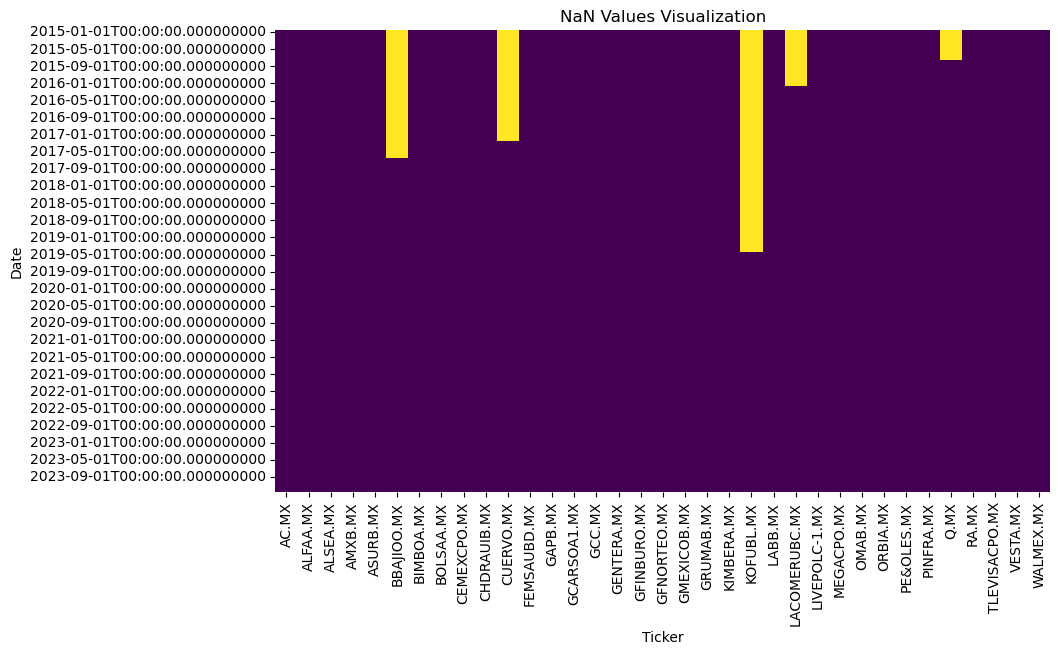

In [7]:
# prompt: visually plot NaN values from data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with NaN values
# Replace 'data' with the actual name of your DataFrame if different

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Visualization')
plt.show()
     

<Axes: xlabel='Ticker', ylabel='Date'>

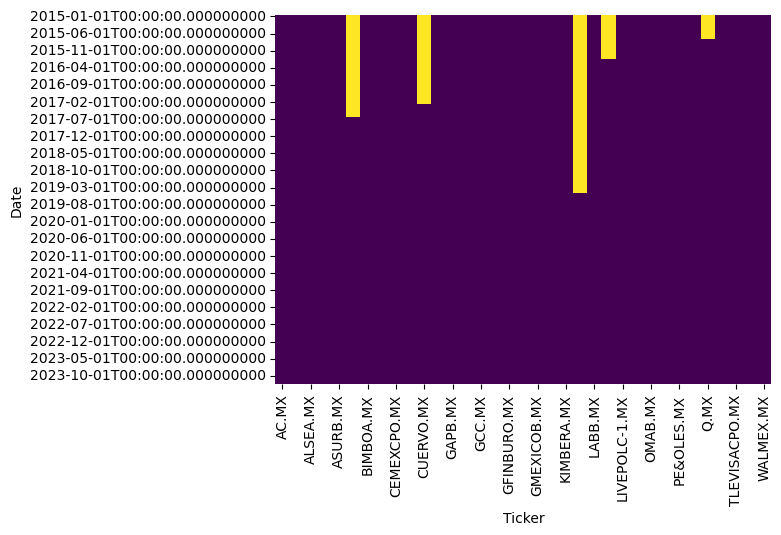

In [8]:

sns.heatmap(data.isna(), cbar=False, cmap='viridis')

In [9]:
# prompt: test my data for normality using Shapiro Wilkins test

from scipy import stats

# Assuming 'data' is your DataFrame with stock closing prices
# and you want to test for normality of a specific stock, e.g., the first one:

stock_name = data.columns[0]  # Replace with the actual column name if needed
stock_data = data[stock_name].dropna() # Drop any NaN values

shapiro_test = stats.shapiro(stock_data)
print(f"Shapiro-Wilk test for {stock_name}:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Interpretation:
# If the p-value is less than your significance level (e.g., 0.05),
# you reject the null hypothesis that the data is normally distributed.

# Example loop for all stocks
for stock_name in data.columns:
    stock_data = data[stock_name].dropna()
    shapiro_test = stats.shapiro(stock_data)
    print(f"\nShapiro-Wilk test for {stock_name}:")
    print(f"Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue}")
     

Shapiro-Wilk test for AC.MX:
Statistic: 0.8597609400749207
P-value: 1.0748594903020603e-08

Shapiro-Wilk test for AC.MX:
Statistic: 0.8597609400749207
P-value: 1.0748594903020603e-08

Shapiro-Wilk test for ALFAA.MX:
Statistic: 0.9099386930465698
P-value: 1.985039034479996e-06

Shapiro-Wilk test for ALSEA.MX:
Statistic: 0.9474962949752808
P-value: 0.0003237927157897502

Shapiro-Wilk test for AMXB.MX:
Statistic: 0.9269416928291321
P-value: 1.6855115973157808e-05

Shapiro-Wilk test for ASURB.MX:
Statistic: 0.9520284533500671
P-value: 0.0006642485968768597

Shapiro-Wilk test for BBAJIOO.MX:
Statistic: 0.8986324071884155
P-value: 1.3405358913587406e-05

Shapiro-Wilk test for BIMBOA.MX:
Statistic: 0.7905523180961609
P-value: 4.2047462733840746e-11

Shapiro-Wilk test for BOLSAA.MX:
Statistic: 0.9382913708686829
P-value: 8.13878359622322e-05

Shapiro-Wilk test for CEMEXCPO.MX:
Statistic: 0.973277747631073
P-value: 0.028305867686867714

Shapiro-Wilk test for CHDRAUIB.MX:
Statistic: 0.7335531711

In [10]:
from scipy import stats
     

for stock_name in data.columns:
    stock_data = data[stock_name].dropna()
    shapiro_test = stats.shapiro(stock_data)
    print(f"\nShapiro-Wilk test for {stock_name}:")
    print(f"Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue}")


Shapiro-Wilk test for AC.MX:
Statistic: 0.8597609400749207
P-value: 1.0748594903020603e-08

Shapiro-Wilk test for ALFAA.MX:
Statistic: 0.9099386930465698
P-value: 1.985039034479996e-06

Shapiro-Wilk test for ALSEA.MX:
Statistic: 0.9474962949752808
P-value: 0.0003237927157897502

Shapiro-Wilk test for AMXB.MX:
Statistic: 0.9269416928291321
P-value: 1.6855115973157808e-05

Shapiro-Wilk test for ASURB.MX:
Statistic: 0.9520284533500671
P-value: 0.0006642485968768597

Shapiro-Wilk test for BBAJIOO.MX:
Statistic: 0.8986324071884155
P-value: 1.3405358913587406e-05

Shapiro-Wilk test for BIMBOA.MX:
Statistic: 0.7905523180961609
P-value: 4.2047462733840746e-11

Shapiro-Wilk test for BOLSAA.MX:
Statistic: 0.9382913708686829
P-value: 8.13878359622322e-05

Shapiro-Wilk test for CEMEXCPO.MX:
Statistic: 0.973277747631073
P-value: 0.028305867686867714

Shapiro-Wilk test for CHDRAUIB.MX:
Statistic: 0.7335531711578369
P-value: 1.0378880914430066e-12

Shapiro-Wilk test for CUERVO.MX:
Statistic: 0.90798

In [11]:
data.skew(axis=0).sort_values(ascending=False)

Ticker
GCARSOA1.MX      2.603202
CHDRAUIB.MX      1.720627
BIMBOA.MX        1.382241
VESTA.MX         1.278668
AC.MX            1.227088
OMAB.MX          1.145898
GFNORTEO.MX      0.931566
BBAJIOO.MX       0.890056
RA.MX            0.794586
GAPB.MX          0.715959
ASURB.MX         0.660460
KOFUBL.MX        0.647315
GMEXICOB.MX      0.643541
PE&OLES.MX       0.634005
KIMBERA.MX       0.615148
AMXB.MX          0.606899
GRUMAB.MX        0.594295
Q.MX             0.590224
FEMSAUBD.MX      0.586658
LIVEPOLC-1.MX    0.495956
ORBIA.MX         0.449429
ALFAA.MX         0.446385
TLEVISACPO.MX    0.284057
WALMEX.MX        0.189661
PINFRA.MX        0.177643
LACOMERUBC.MX    0.158251
GENTERA.MX       0.127384
CUERVO.MX        0.082613
CEMEXCPO.MX      0.049415
GCC.MX          -0.019561
GFINBURO.MX     -0.041311
MEGACPO.MX      -0.091775
BOLSAA.MX       -0.224555
LABB.MX         -0.314518
ALSEA.MX        -0.401810
dtype: float64

<Axes: ylabel='Frequency'>

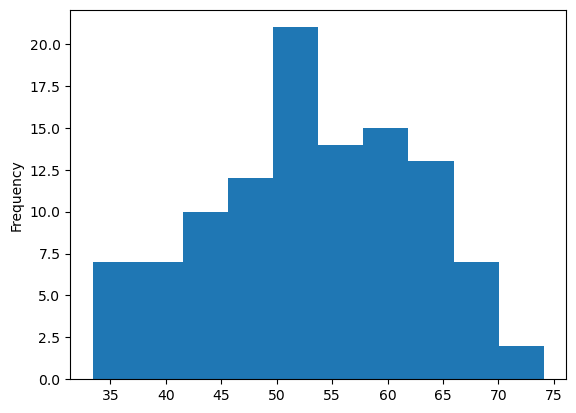

In [12]:

data['MEGACPO.MX'].plot(kind='hist')

In [13]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,ds,y,unique_id
0,2015-01-01,65.702614,AC.MX
1,2015-02-01,70.285492,AC.MX
2,2015-03-01,69.477196,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519691,AC.MX


In [14]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

In [18]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [19]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [20]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [21]:
sf.fit()

C:\Users\maxag\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [ ]:
train_hat = sf.forecast_fitted_values()
     
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(

test_hat.head()

In [ ]:

from sklearn import metrics
import numpy as np
     

def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoARIMA']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [ ]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())